# Introduction to Statistical Mechanics (ME346A)

## Probability and Diffusion

### Install Dependencies

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

### Probability Experiment - Coin Toss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

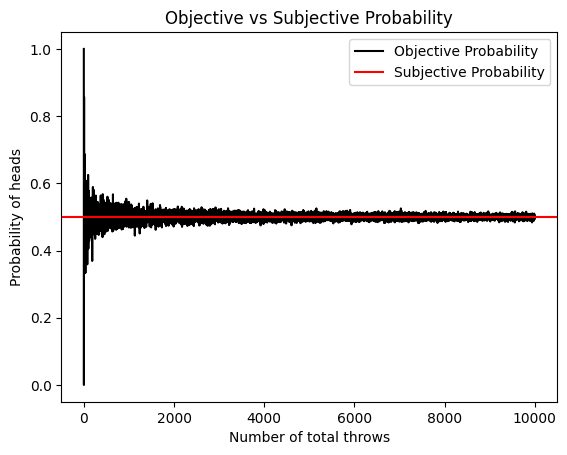

<Figure size 640x480 with 0 Axes>

In [ ]:
# Coin toss
def prob_coin_head(n):
  return np.sum(np.random.rand(n) > 0.5) / n

p_list = []
for i in range(1, 10000):
  p_list.append(prob_coin_head(i))

plt.plot(p_list, color='black', label="Objective Probability")
plt.axhline(0.5, color='red', label="Subjective Probability")
plt.xlabel("Number of total throws")
plt.ylabel("Probability of heads")
plt.title("Objective vs Subjective Probability")
plt.legend()
plt.show()
plt.clf()

### Probability Experiment - Sterling's Formula

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

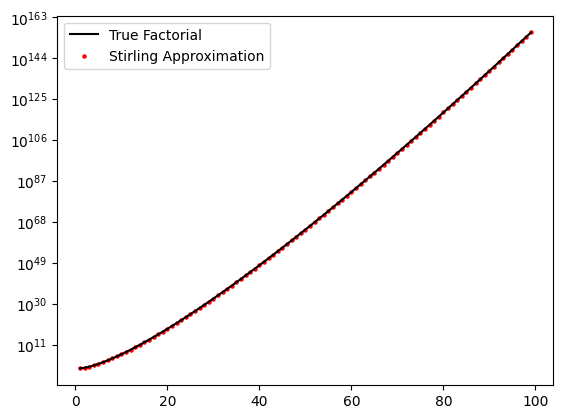

<Figure size 640x480 with 0 Axes>

In [ ]:
def true_factorial(N):
    return math.factorial(N)

def stirling_approx(N):
    return np.sqrt(2 * np.pi * N) * (N / np.exp(1))**N

n_max = 100
plt.plot(range(1, n_max), [true_factorial(n) for n in range(1, n_max)], label='True Factorial', c='black')
plt.scatter(range(1, n_max), [stirling_approx(n) for n in range(1, n_max)], label='Stirling Approximation', c='red', s=5)
plt.legend()
plt.yscale('log')
plt.show()
plt.clf()

### Diffusion in 1D - Discrete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

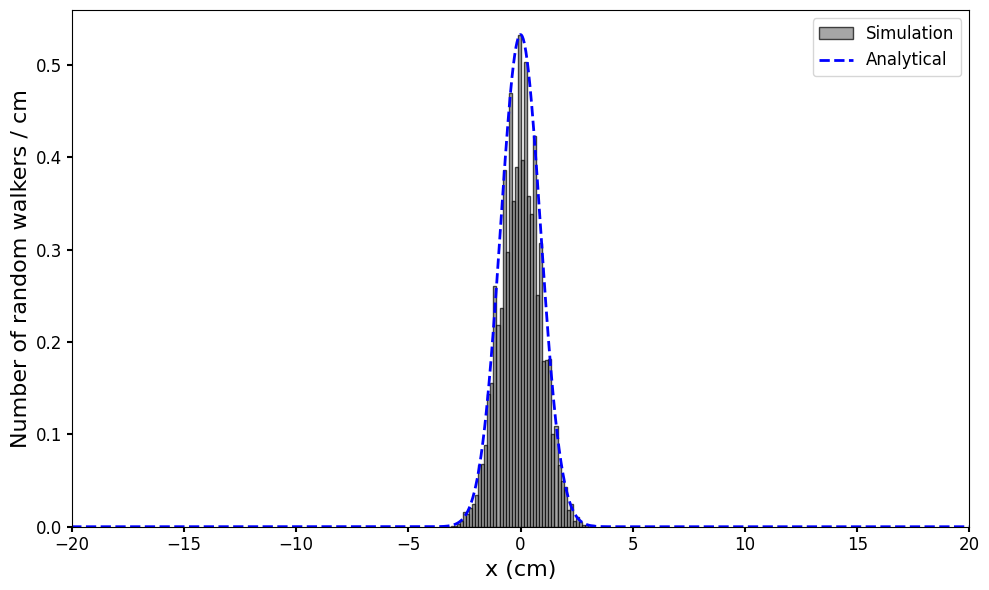

In [2]:
""" Monte Carlo Simulation of a 1D Random Walk """
# Parameters
N = 10000
a = 2e-2
tau = 1e-3
tend = 2 # try 4
totalstep = round(tend / tau)

# Random walk steps
random_steps = 2 * (np.random.rand(totalstep, N) < 0.5) - 1
p = np.sum(random_steps * a, axis=0)

# Analytical solution
D = a ** 2 / 2 / tau
x = np.arange(-40, 40 + a, a)
t = tend
c_xt = N / np.sqrt(4 * np.pi * D * t) * np.exp(-x**2 / (4 * D * t))

# Plot results
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(p, bins=50, density=True, edgecolor='k', facecolor='gray', alpha=0.7, label='Simulation')
scale_factor = np.max(hist) / np.max(c_xt)
c_xt_scaled = c_xt * scale_factor
plt.plot(x, c_xt_scaled, 'b', linewidth=2, linestyle="dashed", label='Analytical')
plt.xlabel('x (cm)', fontsize=16)
plt.ylabel('Number of random walkers / cm', fontsize=16)
plt.xlim(-20, 20)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, width=1.5)
plt.tight_layout()
plt.show()

### Diffusion in 1D - Continuous

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

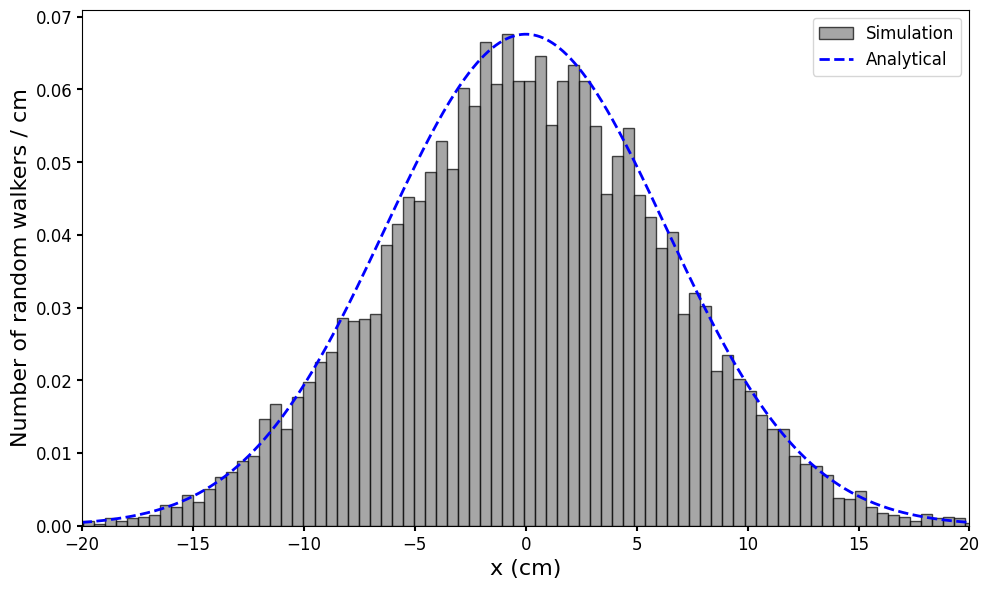

In [ ]:
""" Simulation of a 1D Wiener Process """
# Parameters
N = 10000
dt = 1e-3
tend = 1 # try 2
totalstep = round(tend / dt)
D = 20

# Random walk steps
random_steps = np.sqrt(2 * D * dt) * np.random.randn(totalstep, N)
p = np.sum(random_steps, axis=0)

# Analytical solution
c_xt = N / np.sqrt(4 * np.pi * D * tend) * np.exp(-x**2 / (4 * D * tend))

# Plot results
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(p, bins=100, density=True, edgecolor='k', facecolor='gray', alpha=0.7, label='Simulation')
scale_factor = np.max(hist) / np.max(c_xt)
c_xt_scaled = c_xt * scale_factor
plt.plot(x, c_xt_scaled, 'b', linewidth=2, linestyle="dashed", label='Analytical')
plt.xlabel('x (cm)', fontsize=16)
plt.ylabel('Number of random walkers / cm', fontsize=16)
plt.xlim(-20, 20)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, width=1.5)
plt.tight_layout()
plt.show()

### Diffusion in 1D - Discrete - Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

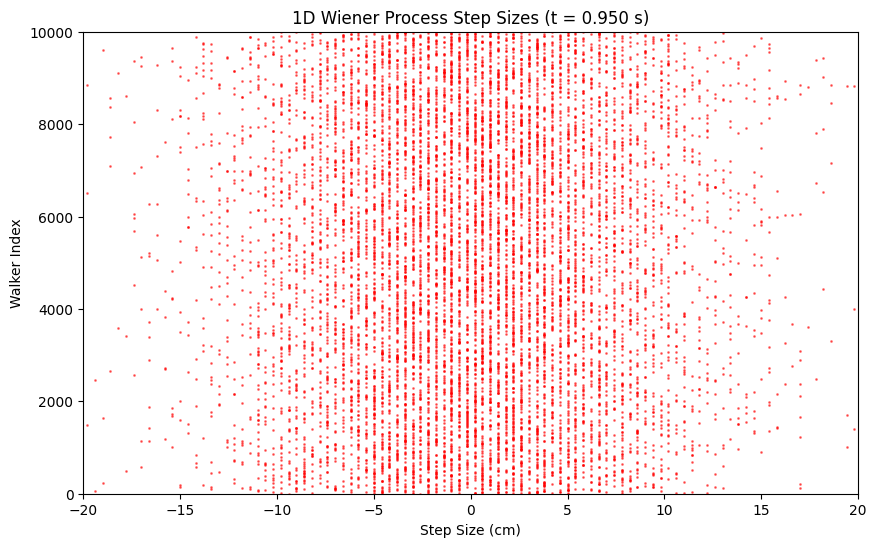

In [ ]:
# Parameters
N = 10000
a = 2e-1
tau = 1e-3
tend = 1 # try 4
totalstep = round(tend / tau)

# Random walk steps
random_steps = 2 * (np.random.rand(totalstep, N) < 0.5) - 1
cumulative_positions = a * np.cumsum(random_steps, axis=0)

# Plot and display function
def plot_frame(frame):
    plt.figure(figsize=(10, 6))
    plt.scatter(cumulative_positions[frame, :], np.arange(N), c='r', s=1, alpha=0.5)
    plt.xlim(-20, +20)
    plt.ylim(0, N)
    plt.xlabel('Step Size (cm)')
    plt.ylabel('Walker Index')
    plt.title(f'1D Wiener Process Step Sizes (t = {frame*dt:.3f} s)')
    display(plt.gcf())
    clear_output(wait=True)
    plt.close()

# Display frames
for frame in range(0, totalstep, 50):
    plot_frame(frame)
    time.sleep(1e-3)

### Diffusion in 1D - Continuous - Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

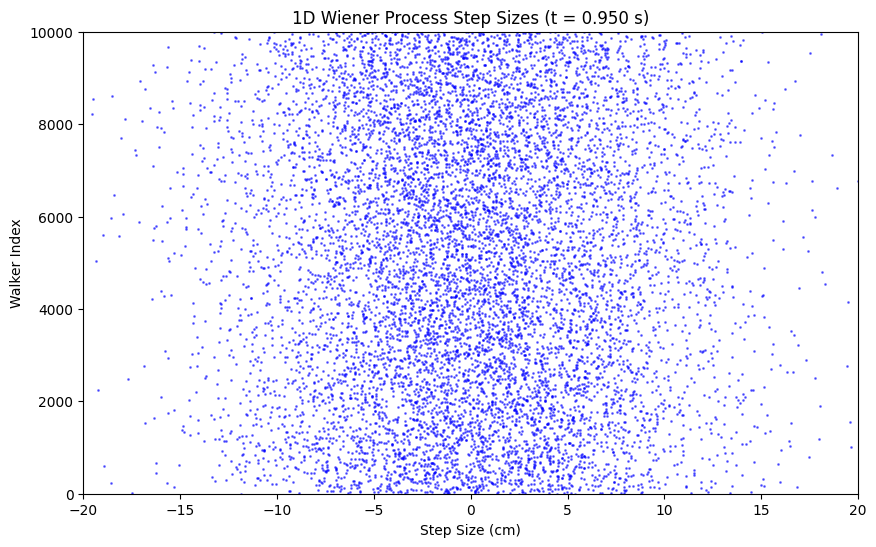

In [ ]:
# Parameters
N = 10000
dt = 1e-3
tend = 1  # try 2
totalstep = round(tend / dt)
D = 20

# Random walk steps
random_steps = np.sqrt(2 * D * dt) * np.random.randn(totalstep, N)
cumulative_positions = np.cumsum(random_steps, axis=0)

# Plot and display function
def plot_frame(frame):
    plt.figure(figsize=(10, 6))
    plt.scatter(cumulative_positions[frame, :], np.arange(N), c='b', s=1, alpha=0.5)
    plt.xlim(-20, +20)
    plt.ylim(0, N)
    plt.xlabel('Step Size (cm)')
    plt.ylabel('Walker Index')
    plt.title(f'1D Wiener Process Step Sizes (t = {frame*dt:.3f} s)')
    display(plt.gcf())
    clear_output(wait=True)
    plt.close()

# Display frames
for frame in range(0, totalstep, 50):
    plot_frame(frame)
    time.sleep(1e-3)

### Diffusion in 1D - Together - Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [ ]:
# Parameters - discrete
N = 10000
a = 2e-1
tau = 1e-3
tend = 1 # try 2
totalstep = round(tend / tau)

# Random walk steps - discrete
random_steps_disc = 2 * (np.random.rand(totalstep, N) < 0.5) - 1
cumulative_positions_disc = a * np.cumsum(random_steps_disc, axis=0)

# Parameters - continuous
N = 10000
dt = 1e-3
tend = 1  # try 2
totalstep = round(tend / dt)
D = 20

# Random walk steps - continuous
random_steps_cont = np.sqrt(2 * D * dt) * np.random.randn(totalstep, N)
cumulative_positions_cont = np.cumsum(random_steps_cont, axis=0)

# Plot and display function
def plot_frame(frame):
    plt.figure(figsize=(10, 6))
    plt.scatter(cumulative_positions_disc[frame, :], np.arange(N), c='r', s=1, alpha=0.5, label="Discrete")
    plt.scatter(cumulative_positions_cont[frame, :], np.arange(N), c='b', s=1, alpha=0.5, label="Continuous")
    plt.xlim(-20, +20)
    plt.ylim(0, N)
    plt.xlabel('Step Size (cm)')
    plt.ylabel('Walker Index')
    plt.title(f'1D Wiener Process Step Sizes (t = {frame*dt:.3f} s)')
    display(plt.gcf())
    clear_output(wait=True)
    plt.close()

# Display frames
for frame in range(0, totalstep, 50):
    plot_frame(frame)
    time.sleep(1e-3)

NameError: name 'np' is not defined